# EDA (Exploratory Data Analysis)

 In this file the provided data is analyzed to find relvant insignt related to pneumonia

### Introduction

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do.

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc.

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia.

### Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from Functions_EDA import PlotDiseasesAge, PlotDiseases, ImagesAndSpectrum, spectrums

### Loading the provided datasets

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5497,00029959_002.png,No Finding,2,29959,074Y,M,AP,3056,2544,0.139,0.139
4942,00026053_000.png,No Finding,0,26053,045Y,M,PA,2964,2972,0.143,0.143
4137,00020349_007.png,No Finding,7,20349,018Y,F,AP,2500,2048,0.168,0.168


In [3]:
data_sample = pd.read_csv(os.path.join(os.getcwd(), 'sample_labels.csv'))
data_sample.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
678,00003513_003.png,No Finding,3,3513,042Y,F,PA,2500,2048,0.168000,0.168000
4702,00023943_000.png,No Finding,0,23943,032Y,M,PA,2500,2048,0.168000,0.168000
5351,00028873_001.png,No Finding,1,28873,015Y,M,PA,1804,1758,0.194311,0.194311


### Data Preprocessing

#### Enconding the labels that describe the characteritics of the metadata

In [4]:
#Finding the labels that describe the population
Etiquetas = []
for Label in all_xray_df['Finding Labels'].unique().tolist():
    for Etiqueta in Label.lower().split('|'):
        Etiquetas.append(Etiqueta)
        
#Creating features that describes the labels in the dataframe
for Etiqueta in set(Etiquetas):
    all_xray_df[Etiqueta] = 0

#Encoding the labels
for Index in all_xray_df.index:
    for Etiqueta in all_xray_df['Finding Labels'].loc[Index].lower().split('|'):
        all_xray_df[Etiqueta].loc[Index] = 1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Removing unnecessary data

- Finding undefined values:

In [5]:
all_xray_df[all_xray_df.columns[0:-len(set(Etiquetas))]].isnull().any()

Image Index                    False
Finding Labels                 False
Follow-up #                    False
Patient ID                     False
Patient Age                    False
Patient Gender                 False
View Position                  False
OriginalImage[Width            False
Height]                        False
OriginalImagePixelSpacing[x    False
y]                             False
Unnamed: 11                     True
dtype: bool

- Removing undefined, duplicated and unnecesary values:

In [6]:
all_xray_df.drop(['Unnamed: 11', 'Finding Labels', 'no finding'], axis=1, inplace=True)

- Reducing the range for the people age, accorrdingly with the life expectancy in most countries:

In [7]:
all_xray_df.drop(all_xray_df[(all_xray_df['Patient Age'] > 80) | (all_xray_df['Patient Age'] < 0)].index, axis=0, inplace=True)

#### Including the images paths in the dataframe

#### Encoding the population gender

In [8]:
all_xray_df['Patient Gender'].loc[all_xray_df[all_xray_df['Patient Gender'] == 'M'].index] = 0
all_xray_df['Patient Gender'].loc[all_xray_df[all_xray_df['Patient Gender'] == 'F'].index] = 1

### Visualizing the population characteristics

- Population age distribution in the presence of pneumonia

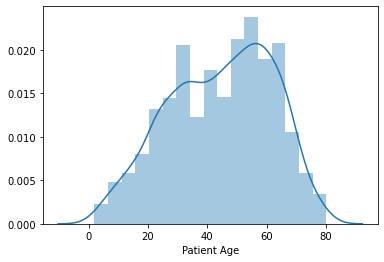

In [9]:
sns.distplot(all_xray_df[all_xray_df.pneumonia == 1]['Patient Age'])

- Population age distribution in the absence of pneumonia

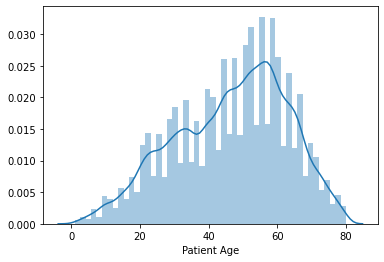

In [10]:
sns.distplot(all_xray_df[all_xray_df.pneumonia == 0]['Patient Age'])

- Population gender distribution in the presence of pneumonia

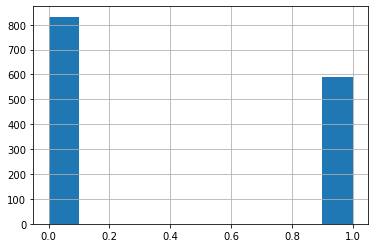

In [11]:
all_xray_df[all_xray_df.pneumonia == 1]['Patient Gender'].hist()

- Population gender distribution in the absence of pneumonia

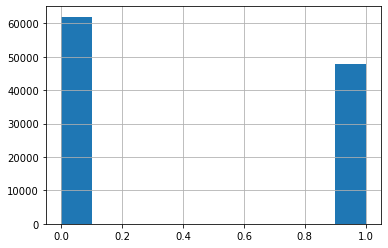

In [12]:
all_xray_df[all_xray_df.pneumonia == 0]['Patient Gender'].hist()

### Visualazing the diseases in the metadata

- Visualizing the population diseases ocurrences related to their age, in the absence of pneumonia

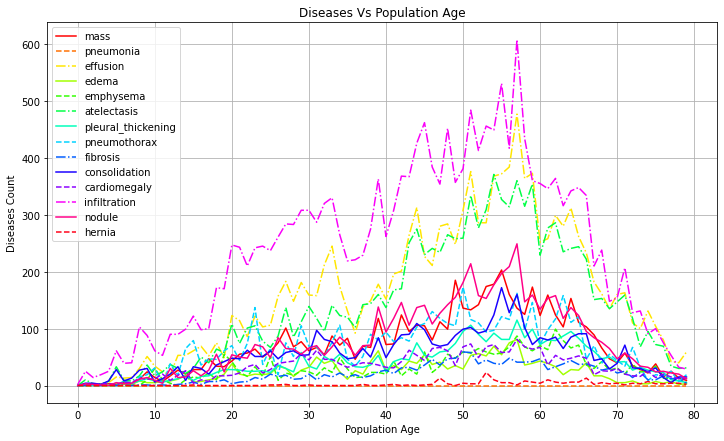

In [13]:
PlotDiseasesAge(all_xray_df,'Patient Age', pneumonia=False)

- Visualizing the population diseases ocurrences related to their age, in the presence of pneumonia

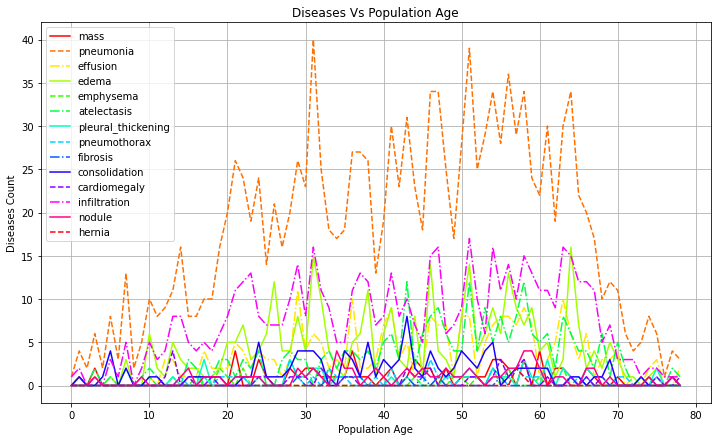

In [14]:
PlotDiseasesAge(all_xray_df, 'Patient Age', pneumonia=True)

### Visualizing the diseases ocurrences

- Diseases ocurrences in the absence of pnuemonia

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


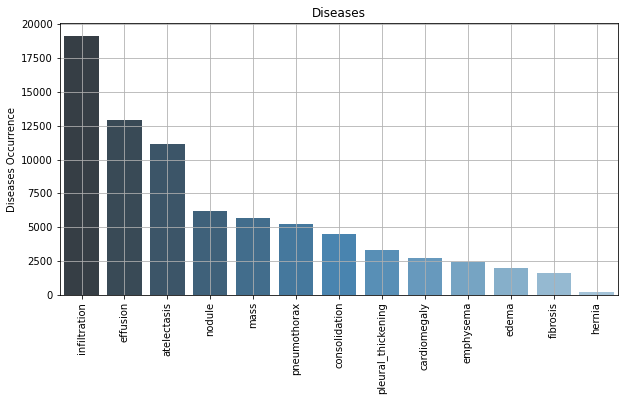

In [15]:
PlotDiseases(all_xray_df, 'pneumonia', pneumonia=False, pallete='Blues_d')

- Diseases ocurrences in the presence of pnuemonia

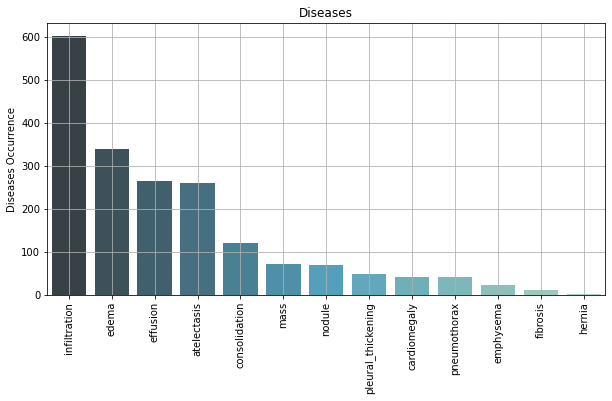

In [16]:
PlotDiseases(all_xray_df, 'pneumonia', pneumonia=True, pallete='GnBu_d')

### Conclusions

It can be seen in the previous figures that the data provided contain information of pneumonia cases, as well as cases when this disease is not present. Furthermore, it also provides diseases that can be related or not with the disease of interest. For all cases present in the data provided, it was found a bigger presence of male patients when compared against females. Additionally, most patients ages found in the dataframe are in the range of 40 to 70 years old.

Moreover, it was observed that not all diseases have a significant occurrence in the present or absent of pneumonia, in terms of the amount of occurrence compared against the number of cases in the presence or absence of pneumonia. It can be concluded that only diseases such as edema, effusion and infiltration can be considered as related. The use of the correlation coefficient was avoided due to the low variability of the features that represent the diseases present in the provided dataset.


### Visualizing images

In [17]:
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)

Scans found: 112120 , Total Headers 111223


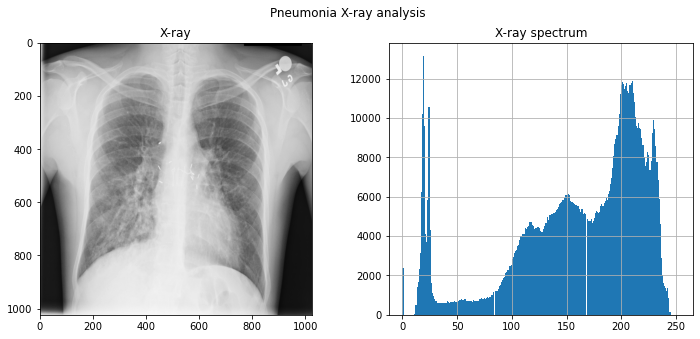

In [18]:
ImagesAndSpectrum(all_xray_df, 10, 1, size=(13,5), title='Pneumonia X-ray analysis');

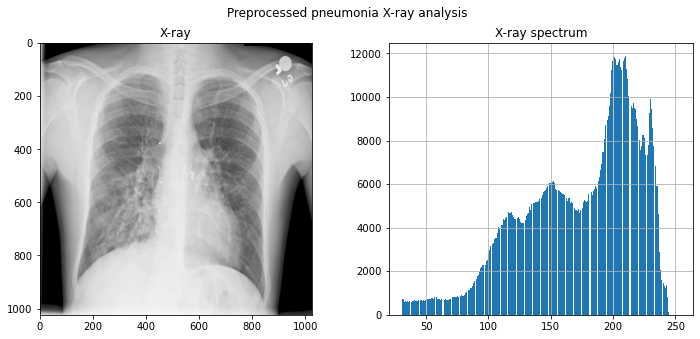

In [19]:
ImagesAndSpectrum(all_xray_df, 10, 1, size=(13,5), title='Preprocessed pneumonia X-ray analysis', threshold=30);

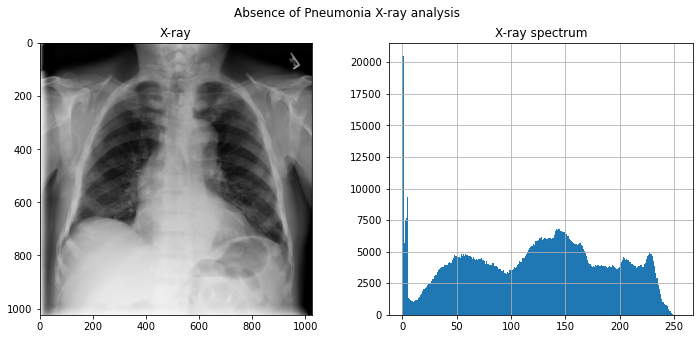

In [20]:
ImagesAndSpectrum(all_xray_df, 24, 0, size=(13,5), title='Absence of Pneumonia X-ray analysis')

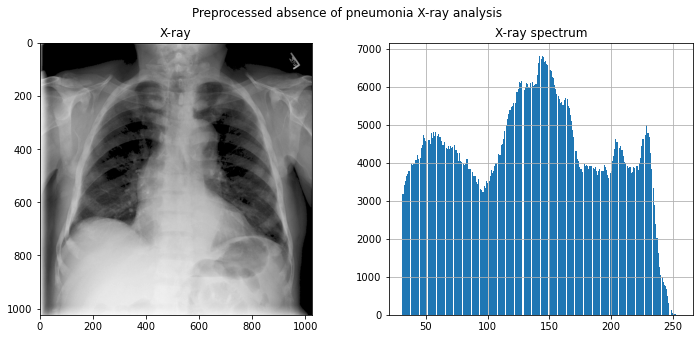

In [21]:
ImagesAndSpectrum(all_xray_df, 24, 0, size=(13,5), title='Preprocessed absence of pneumonia X-ray analysis', threshold=30)

### Visualizing averaged spectrums for different conditions

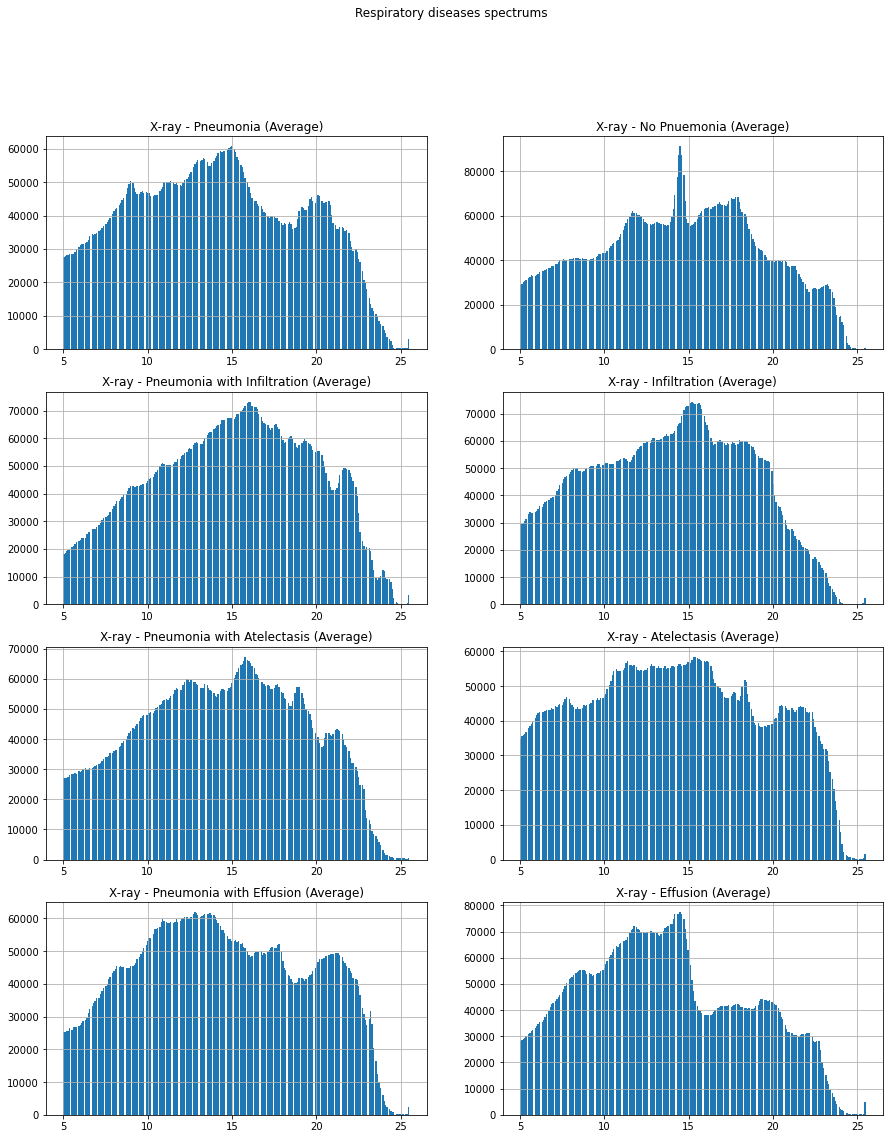

In [23]:
spectrums(all_xray_df)

### Conclusion

The images related with the cases of pneumonia show that it is difficult to see its presence or absent only by looking at them. However, its spectrum is analyzed, it is easy to note differences. Nonetheless, it is necessary to run a more robust analysis to determine which characteristics of the spectrum is related to the disease of interest, since the data provided contains information about patients having different diseases. 

Moreover, there are also presented spectrums for the diseases images. From them, we can conclude that it is difficult to determine pneumonia cases with a simple visual inspection. Thus, it can be concluded and necessary that different tools need to be used in combination with specialist to determine, from x_ray images, which ones are related to different diseases, especially to pneumonia which is the disease of interests. 

## FIN